In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.graphics.gofplots as smgf
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

plt.rcParams.update({'font.size': 14})

# Reziduuri

In [2]:
# https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/
# see also http://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/
cars = pd.read_csv('mtcars.csv')
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
mf = 'mpg ~ cyl + disp + hp + drat + wt + qsec + gear + carb'
model = smf.ols(formula=mf, data=cars).fit()

m_fitted_y = model.fittedvalues
m_resid = model.resid

# normalized residuals
m_norm_resid = model.get_influence().resid_studentized_internal
m_norm_resid_sqrt = np.sqrt(np.abs(m_norm_resid))
m_abs_resid = np.abs(m_resid)

m_leverage = model.get_influence().hat_matrix_diag
m_cooks = model.get_influence().cooks_distance[0]

In [4]:
print(OLSInfluence(model).dffits)

(array([-2.58041672e-01, -6.78274732e-02, -5.77871273e-01,  3.42200273e-02,
        1.47440482e-01, -4.48855377e-01, -1.79289984e-01,  1.61295869e-01,
       -1.44744235e+00, -9.05025642e-02, -4.78989159e-01,  6.53128328e-01,
        3.20078722e-01, -8.55331101e-02, -3.55057856e-01, -1.36938695e-03,
        1.44819346e+00,  8.82384756e-01,  3.68837168e-01,  1.07296273e+00,
       -1.06268486e+00, -3.60879497e-01, -5.13829469e-01, -2.62641723e-01,
        5.10759391e-01, -5.27844934e-02, -3.40848339e-01,  8.30473419e-01,
       -2.82349233e+00, -3.01484313e-02,  1.22608469e+00, -5.31365877e-01]), 1.0606601717798212)


In [5]:
print(OLSInfluence(model).dfbetas[:29, 8])

[-1.57323170e-01 -3.37986226e-02  3.31171700e-01  6.98409935e-03
  1.85242606e-02  6.62092645e-02 -7.19692122e-02  1.86172764e-02
 -2.12302391e-01 -3.00291627e-03 -6.50592391e-02 -3.78695670e-01
 -9.67719924e-02  2.34278924e-02 -1.46344425e-01 -9.40390373e-05
 -3.60019812e-01 -4.36923001e-01  1.60953644e-01  8.76714780e-03
 -1.32658684e-01  2.78191062e-02  8.70655057e-02  2.66120177e-02
  4.56249232e-02  1.28638239e-02  1.41701658e-01 -3.69623920e-02
  1.35821718e+00]


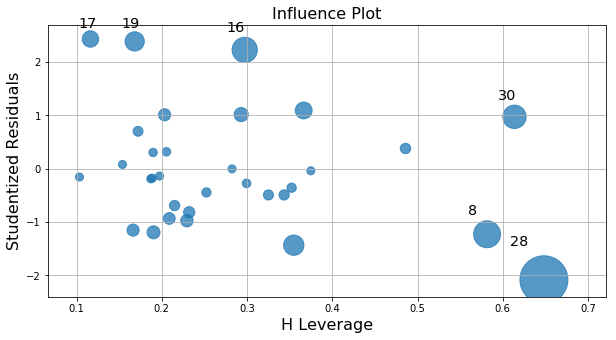

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sm.graphics.influence_plot(model, criterion='cooks', ax=ax)
plt.grid()
plt.show()

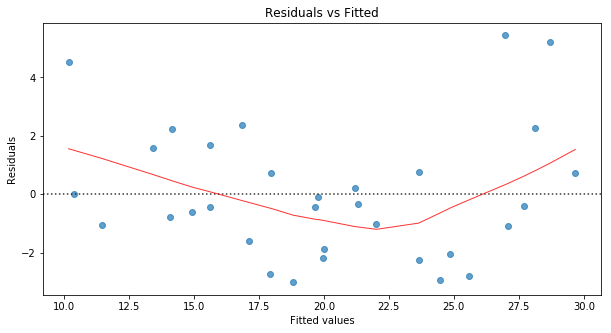

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.residplot(m_fitted_y, 'mpg', data=cars, lowess=True, scatter_kws={'alpha': 0.7},
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.show()

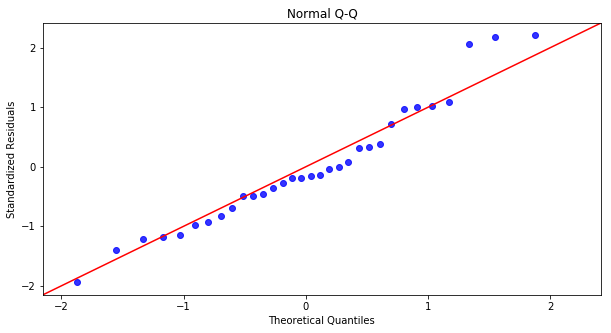

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
qq = smgf.ProbPlot(m_norm_resid)
qq.qqplot(line='45', alpha=0.8, lw=1, ax=ax)
ax.set_title('Normal Q-Q')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Standardized Residuals')
plt.show()

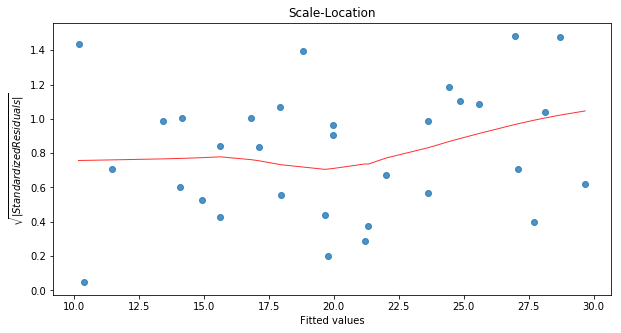

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.regplot(m_fitted_y, m_norm_resid_sqrt, scatter=True, lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized Residuals|}$')
plt.show()

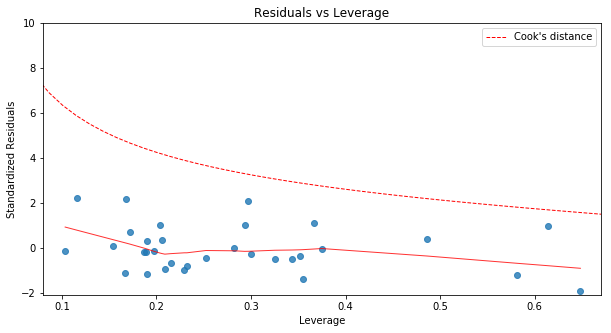

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.regplot(m_leverage, m_norm_resid, scatter=True, lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')
ax.set_xlim(0.08, 0.67)
ax.set_ylim(-2.1, 10)

def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    ax.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.7, 50), 'Cook\'s distance') # 0.5 line
#graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
#      np.linspace(0.001, 0.7, 50)) # 1 line
ax.legend(loc='upper right');
plt.show()

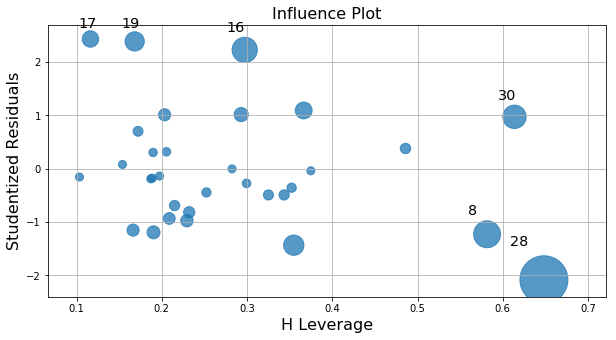

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sm.graphics.influence_plot(model, criterion='cooks', ax=ax)
plt.grid() ; plt.show()

# Exemplu de leverage point

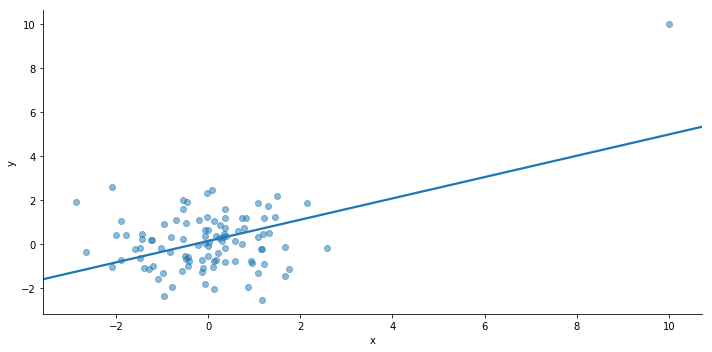

In [12]:
n = 100
x, y = np.r_[10, np.random.randn(n)], np.r_[10, np.random.randn(n)]
df = pd.DataFrame({'x': x, 'y': y})

sns.lmplot(x='x', y='y', data=df, aspect=2, ci=None,  # ci='95'
        scatter_kws={'lw': 1, 'alpha': 0.5})
plt.show()

In [13]:
model = smf.ols(formula='y ~ x', data=df).fit()
print(OLSInfluence(model).dfbetas[:10, 1])

[ 5.76311047e+00 -3.35995938e-02  1.21336643e-02  7.31099346e-02
 -5.14138293e-03 -1.69816557e-02 -1.24356382e-02 -1.78213714e-02
 -4.27590804e-03  3.60117034e-02]


In [14]:
print(OLSInfluence(model).summary_frame().hat_diag.values[:10])

[0.47399301 0.02056548 0.01090424 0.01297485 0.00995143 0.01765782
 0.01014738 0.01509838 0.02701506 0.01682799]


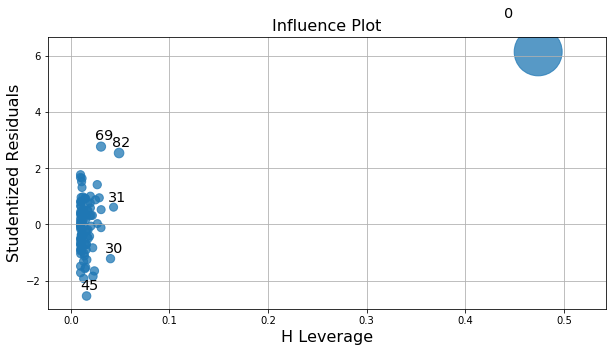

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sm.graphics.influence_plot(model, criterion='cooks', ax=ax)
plt.grid() ; plt.show()

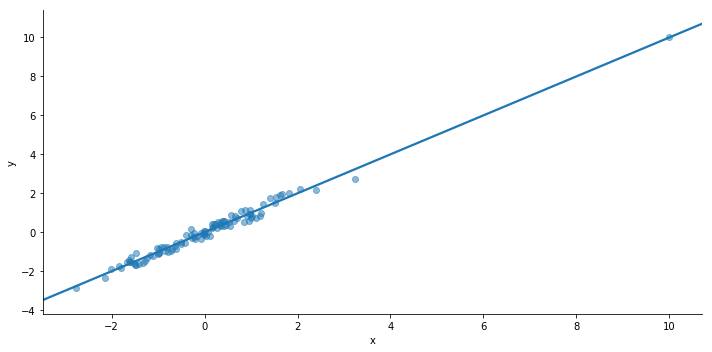

In [16]:
n = 100
x = np.r_[10, np.random.randn(n)] 
y = np.r_[10, x[1:] + .2 * np.random.randn(n)]
df = pd.DataFrame({'x': x, 'y': y})

sns.lmplot(x='x', y='y', data=df, aspect=2, ci=None, # ci='95'
           scatter_kws={'lw': 1, 'alpha': 0.5})
plt.show()

In [17]:
model = smf.ols(formula='y ~ x', data=df).fit()
print(OLSInfluence(model).dfbetas[:10, 1])

[ 0.10520453 -0.01205799  0.03926513 -0.01203086 -0.10743399 -0.06189276
  0.00030072 -0.04541733 -0.12897114  0.03895403]


In [18]:
print(OLSInfluence(model).summary_frame().hat_diag.values[:10])

[0.46210662 0.00995297 0.01218001 0.01076619 0.01654149 0.01457984
 0.0099028  0.01122486 0.01520943 0.0145874 ]


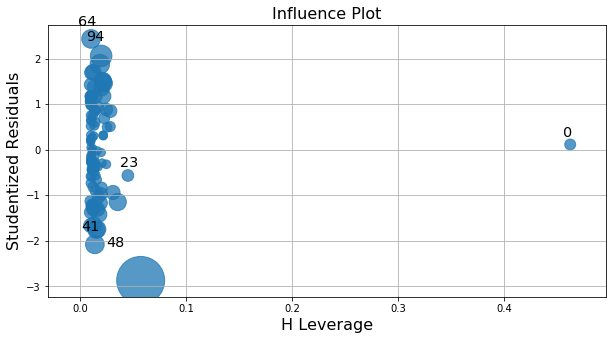

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sm.graphics.influence_plot(model, criterion='cooks', ax=ax)
plt.grid() ; plt.show()

In [20]:
st = pd.read_csv('stefanski.txt')
st = np.array([float(y) for x in st.values for y in x[0].split()]).reshape(-1, 5)
st = pd.DataFrame(st)
st.columns = ['v1', 'v2', 'v3', 'v4', 'v5']
st.head()

,v1,v2,v3,v4,v5
0,-0.75052,-0.282230,0.228190,-0.084136,-0.24748
1,-0.39380,-0.074787,-0.013689,0.072776,-0.36026
2,-0.15599,0.358390,-0.118070,0.013815,-0.65672
3,-0.68392,-0.059086,-0.060048,-0.231480,-0.03806
4,-0.59474,0.148360,-0.097664,0.667820,-1.05450


In [21]:
model = smf.ols(formula='v1 ~ v2 + v3 + v4 + v5 - 1', data=st).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     v1   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     30.96
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.85e-25
Time:                        17:27:57   Log-Likelihood:                -3260.2
No. Observations:                2298   AIC:                             6528.
Df Residuals:                    2294   BIC:                             6551.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v2             0.9856      0.128      7.701      0.000       0.735       1.237
v3             0.9715      0.127      7.671      0.000       0.723       1.220
v4             0.8606      0.120      7.197      0.000       0.626       1.095
v5             0.9267      0.083     11.127      0.000       0.763       1.090
==============================================================================
Omnibus:                     1417.819   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.591
Skew:                          -0.141   Prob(JB):                     1.33e-30
Kurtosis:                       1.835   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

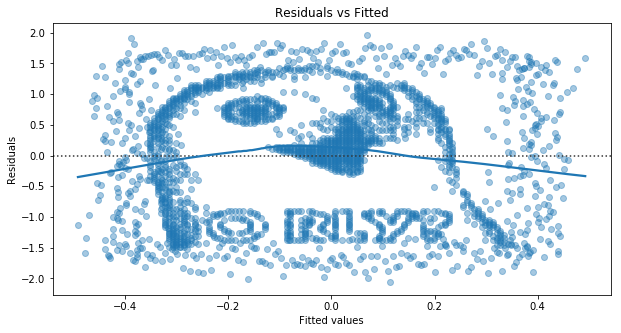

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.residplot(model.fittedvalues, 'v1', data=st, lowess=True, scatter_kws={'alpha': 0.4})
ax.set_title('Residuals vs Fitted') ; ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals') ; plt.show()

# Laborator

__Q1.__ Pentru datele de mai jos (cazul 1 de la curs):

a) reconstruiți graficul de la curs, figurînd mediile pentru ambele grupuri, și reconstruind dreptele de regresie (grupurile și dreptele colorate diferit, în funcție de grup);

b) observați diferența între medii precum și diferența dintre intercept-uri;

c) construiți valorile $y$ pentru a obține, succesiv, graficele din cazurile 2 - 5 de la curs, cu aceleași remarci de la punctul b).

Media grup1 :  0.5205149023014398
Media grup2 :  0.5126424352084492


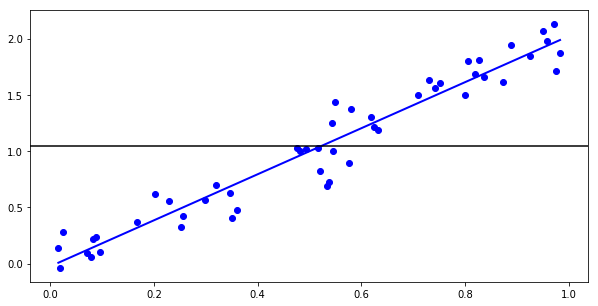

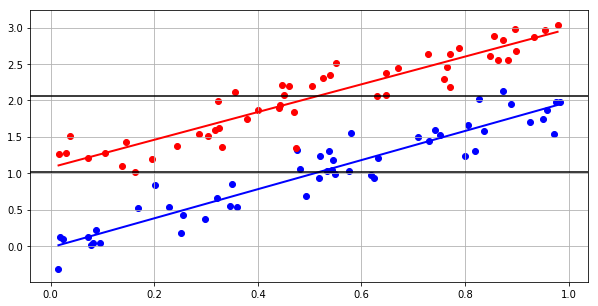

In [62]:
n, sigma = 50, .2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n), + np.random.rand(n)]
t = np.array([0]*n + [1]*n)
y = beta0 + t + x * beta1 + np.random.randn(2*n)*sigma
lm1 = sm.OLS(y[:n], sm.add_constant(x[:n])).fit()
lm2 = sm.OLS(y[n:], sm.add_constant(x[n:])).fit()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x[:n], y[:n], c='b')
ax.plot(np.sort(x[:n]), lm1.params[0] + lm1.params[1] * np.sort(x[:n]), 'b', lw=2)
ax.axhline(y=y[:n].mean(), c='k')

# fill in your code
x1 = x[:n]
x2 = x[n:]
t1 = t[:n]
t2 = t[n:]
print('Media grup1 : ', np.mean(x1))
print('Media grup2 : ', np.mean(x2))
y1 = beta0 + t1 + x1 * beta1 + np.random.randn(n)*sigma
y2 = beta0 + t2 + x2 * beta1 + np.random.randn(n)*sigma
lm1 = sm.OLS(y1, sm.add_constant(x1)).fit()
lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x1, y1, c='b')
ax.plot(np.sort(x1), lm1.params[0] + lm1.params[1] * np.sort(x1), 'b', lw=2)
ax.axhline(y=y1.mean(), c='k')
ax.scatter(x2, y2, c='r')
ax.plot(np.sort(x2), lm2.params[0] + lm2.params[1] * np.sort(x2), 'r', lw=2)
ax.axhline(y=y2.mean(), c='k')


ax.grid() ; plt.show()
#caz 1 : nu sunt corelate

In [63]:
print('Medie grup1 : ', np.mean(y1))
print('Medie grup2 : ', np.mean(y2))

print('Intercept grup1 : ', lm1.params[0])
print('Intercept grup2 : ', lm2.params[0])

Medie grup1 :  1.0203901531591395
Medie grup2 :  2.0534184353925595
Intercept grup1 :  -0.02057835546673213
Intercept grup2 :  1.076677004358584


Media grup1 :  0.4661243546121947
Media grup2 :  1.9828734259608172


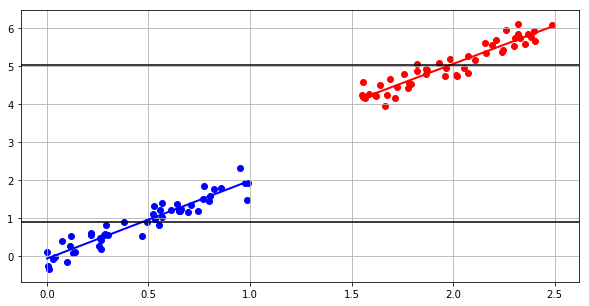

In [64]:
n, sigma = 50, .2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n), + (np.random.rand(n)+1.5)]
t = np.array([0]*n + [1]*n)

# fill in your code
x1 = x[:n]
x2 = x[n:]
t1 = t[:n]
t2 = t[n:]
print('Media grup1 : ', np.mean(x1))
print('Media grup2 : ', np.mean(x2))
y1 = beta0 + t1 + x1 * beta1 + np.random.randn(n)*sigma
y2 = beta0 + t2 + x2 * beta1 + np.random.randn(n)*sigma
lm1 = sm.OLS(y1, sm.add_constant(x1)).fit()
lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x1, y1, c='b')
ax.plot(np.sort(x1), lm1.params[0] + lm1.params[1] * np.sort(x1), 'b', lw=2)
ax.axhline(y=y1.mean(), c='k')
ax.scatter(x2, y2, c='r')
ax.plot(np.sort(x2), lm2.params[0] + lm2.params[1] * np.sort(x2), 'r', lw=2)
ax.axhline(y=y2.mean(), c='k')


ax.grid() ; plt.show()
#caz 2
#variabilaX este puternic legata de grup (variabila T)
#daca stim X, putem determina din ce grup face parte punctul; exista o margine bine delimitata

In [65]:
print('Medie grup1 : ', np.mean(y1))
print('Medie grup2 : ', np.mean(y2))

print('Intercept grup1 : ', lm1.params[0])
print('Intercept grup2 : ', lm2.params[0])

Medie grup1 :  0.8882172837764475
Medie grup2 :  5.026377705068538
Intercept grup1 :  -0.06962558592137903
Intercept grup2 :  1.0228251092865681


Media grup1 :  2.23711801360242
Media grup2 :  1.002888756877626


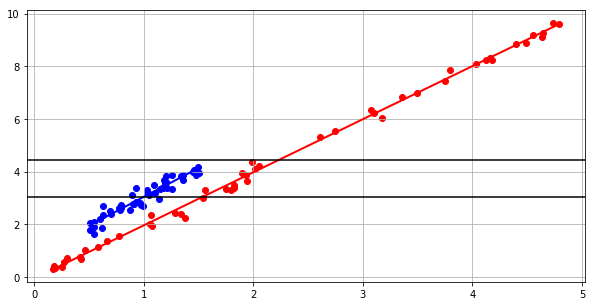

In [93]:
n, sigma = 50, .2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n)*5, + (np.random.rand(n)+0.5)]
t = np.array([0]*n + [1]*n)

# fill in your code
x1 = x[:n]
x2 = x[n:]
t1 = t[:n]
t2 = t[n:]
print('Media grup1 : ', np.mean(x1))
print('Media grup2 : ', np.mean(x2))
y1 = beta0 + t1 + x1 * beta1 + np.random.randn(n)*sigma
y2 = beta0 + t2 + x2 * beta1 + np.random.randn(n)*sigma
lm1 = sm.OLS(y1, sm.add_constant(x1)).fit()
lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x1, y1, c='r')
ax.plot(np.sort(x1), lm1.params[0] + lm1.params[1] * np.sort(x1), 'r', lw=2)
ax.axhline(y=y1.mean(), c='k')
ax.scatter(x2, y2, c='b')
ax.plot(np.sort(x2), lm2.params[0] + lm2.params[1] * np.sort(x2), 'b', lw=2)
ax.axhline(y=y2.mean(), c='k')


ax.grid() ; plt.show()
#caz 3 
#exista suprapunere intre grupuri

In [94]:
print('Medie grup1 : ', np.mean(y1))
print('Medie grup2 : ', np.mean(y2))

print('Intercept grup1 : ', lm1.params[0])
print('Intercept grup2 : ', lm2.params[0])

Medie grup1 :  4.454920072217295
Medie grup2 :  3.049420476806869
Intercept grup1 :  -0.052781351700073975
Intercept grup2 :  0.8579021749622254


Media grup1 :  0.5310820788893529
Media grup2 :  0.05117681528945431


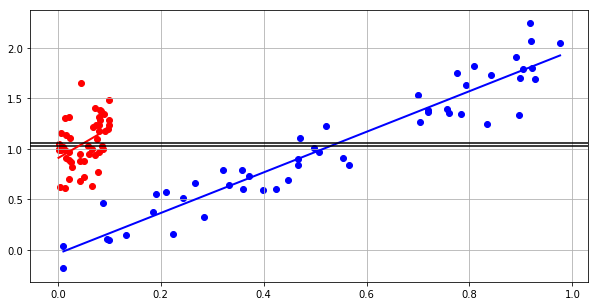

In [87]:
n, sigma = 50, .2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n), + (np.random.rand(n)*0.1)]
t = np.array([0]*n + [1]*n)

# fill in your code
x1 = x[:n]
x2 = x[n:]
t1 = t[:n]
t2 = t[n:]
print('Media grup1 : ', np.mean(x1))
print('Media grup2 : ', np.mean(x2))
y1 = beta0 + t1 + x1 * beta1 + np.random.randn(n)*sigma
y2 = beta0 + t2 + x2 * beta1 + np.random.randn(n)*sigma
lm1 = sm.OLS(y1, sm.add_constant(x1)).fit()
lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x1, y1, c='b')
ax.plot(np.sort(x1), lm1.params[0] + lm1.params[1] * np.sort(x1), 'b', lw=2)
ax.axhline(y=y1.mean(), c='k')
ax.scatter(x2, y2, c='r')
ax.plot(np.sort(x2), lm2.params[0] + lm2.params[1] * np.sort(x2), 'r', lw=2)
ax.axhline(y=y2.mean(), c='k')


ax.grid() ; plt.show()
#caz 4 
#fara diferenta intre medii

In [88]:
print('Medie grup1 : ', np.mean(y1))
print('Medie grup2 : ', np.mean(y2))

print('Intercept grup1 : ', lm1.params[0])
print('Intercept grup2 : ', lm2.params[0])

Medie grup1 :  1.0310604360139708
Medie grup2 :  1.0600834780642754
Intercept grup1 :  -0.03734798568310999
Intercept grup2 :  0.9075530337939857


Media grup1 :  -0.1143772034037965
Media grup2 :  -0.1554961370952862


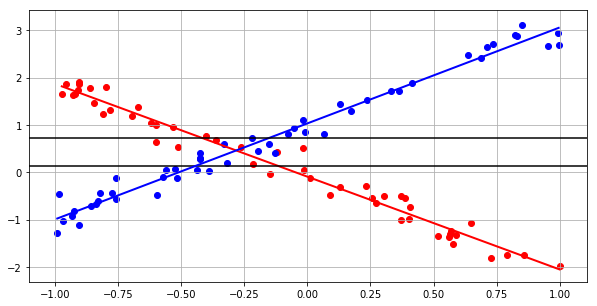

In [70]:
n, sigma = 50, .2
beta0, beta1 = 0, 2
x = np.r_[np.random.rand(n)*2-1, + (np.random.rand(n)*2-1)]
t = np.array([0]*n + [1]*n)

# fill in your code
x1 = x[:n]
x2 = x[n:]
t1 = t[:n]
t2 = t[n:]
print('Media grup1 : ', np.mean(x1))
print('Media grup2 : ', np.mean(x2))
y1 = beta0 + t1 + x1 * -beta1 + np.random.randn(n)*sigma
y2 = beta0 + t2 + x2 * beta1 + np.random.randn(n)*sigma
lm1 = sm.OLS(y1, sm.add_constant(x1)).fit()
lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x1, y1, c='r')
ax.plot(np.sort(x1), lm1.params[0] + lm1.params[1] * np.sort(x1), 'r', lw=2)
ax.axhline(y=y1.mean(), c='k')
ax.scatter(x2, y2, c='b')
ax.plot(np.sort(x2), lm2.params[0] + lm2.params[1] * np.sort(x2), 'b', lw=2)
ax.axhline(y=y2.mean(), c='k')


ax.grid() ; plt.show()

In [32]:
print('Medie grup1 : ', np.mean(y1))
print('Medie grup2 : ', np.mean(y2))

print('Intercept grup1 : ', lm1.params[0])
print('Intercept grup2 : ', lm2.params[0])

Medie grup1 :  0.011509422916841934
Medie grup2 :  0.015916321639193362
Intercept grup1 :  0.004859366179001259
Intercept grup2 :  0.987159562552662


__Q2.__ Pentru datele sintetice generate mai jos:

a) realizați scatter plot-ul împreună cu dreapta de regresie Y($x_1$); există corelație între $Y$ și $x_1$?

b) figurați, precum la curs, culoarea punctului în funcție de $x_2$;

c) analizați acum dependența liniară dintre reziduurile lui $Y$ și $x_1$, anume dependența dintre $Y$ și $x_1$ în cazul în care din ambele variabile variabilitatea lui $x_2$ a fost deja eliminată. Ce observați?

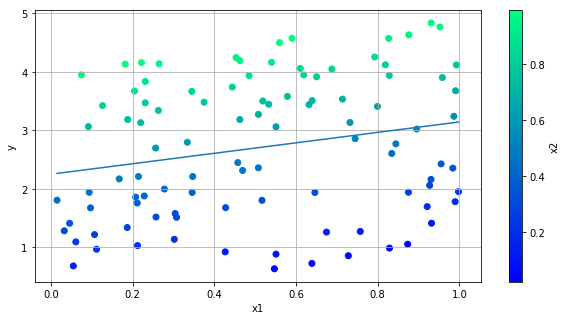

In [95]:
p, n = 1, 100
x2 = np.random.rand(n)
x1 = p * np.random.rand(n) - (1-p) * x2
beta0, beta1, tau, sigma = 0, 1, 4, .01
y = beta0 + x1 * beta1 + tau * x2 + np.random.randn(n)*sigma
df = pd.DataFrame({'x1': x1, 'y': y})
params = smf.ols(formula='y ~ x1', data=df).fit().params

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cm = plt.cm.get_cmap('winter')
sc = ax.scatter(x1, y, c=x2, cmap=cm)
x = np.linspace(min(x1), max(x1), 10)
ax.plot(x, params[0] + x * params[1])
ax.set_xlabel('x1') ; ax.set_ylabel('y')
fig.colorbar(sc, ax=ax).set_label('x2')
ax.grid() ; plt.show()

In [96]:
print('Corelatie intre y si x1: ', np.corrcoef(y,x1)[0,1])

Corelatie intre y si x1:  0.2254885727802644


In [35]:
df['x2'] = x2
smf1 = smf.ols(formula='y ~ x2', data=df).fit()
smf2 = smf.ols(formula='x1 ~ x2', data=df).fit()

df['residY'] = smf1.resid
df['residX1'] = smf2.resid

smf_ = smf.ols(formula='residY ~ residX1 - 1', data=df).fit()
_smf = smf.ols(formula='y ~ x1 + x2', data=df).fit()
_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.385e+05
Date:                Tue, 04 Jun 2019   Prob (F-statistic):          1.61e-200
Time:                        17:28:05   Log-Likelihood:                 313.94
No. Observations:                 100   AIC:                            -621.9
Df Residuals:                      97   BIC:                            -614.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0022      0.003     -0.881      0.380      -0.007       0.003
x1             1.0020      0.004    249.025      0.000       0.994       1.010
x2             3.9996      0.004   1025.874      0.000       3.992       4.007
==============================================================================
Omnibus:                        0.221   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.022
Skew:                          -0.012   Prob(JB):                        0.989
Kurtosis:                       3.068   Cond. No.                         4.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
smf_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 residY   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.329e+04
Date:                Tue, 04 Jun 2019   Prob (F-statistic):          9.70e-141
Time:                        17:28:05   Log-Likelihood:                 313.94
No. Observations:                 100   AIC:                            -625.9
Df Residuals:                      99   BIC:                            -623.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
residX1        1.0020      0.004    251.580      0.000       0.994       1.010
==============================================================================
Omnibus:                        0.221   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.022
Skew:                          -0.012   Prob(JB):                        0.989
Kurtosis:                       3.068   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#X2 nu este relevant : coeficientul lui x1 = coeficientul lui residX1

__Q3.__ Pentru setul seatbelts, potriviți un model liniar pentru răspunsul deaths în funcție de predictorii kms și PetrolPrice. Interpretați rezultatele.

In [40]:
seatbelts = pd.read_csv('seatbelts.csv')
seatbelts.head()

,Unnamed: 0,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
0,1,107,1687,867,269,9059,0.102972,12,0
1,2,97,1508,825,265,7685,0.102363,6,0
2,3,102,1507,806,319,9963,0.102062,12,0
3,4,87,1385,814,407,10955,0.100873,8,0
4,5,119,1632,991,454,11823,0.101020,10,0


In [41]:
lm = smf.ols(formula='DriversKilled ~ kms + PetrolPrice', 
             data=seatbelts).fit()
print(lm.params)
lm.summary()

Intercept      215.746125
kms             -0.001750
PetrolPrice   -643.789460
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          DriversKilled   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     21.37
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           4.29e-09
Time:                        17:36:18   Log-Likelihood:                -873.28
No. Observations:                 192   AIC:                             1753.
Df Residuals:                     189   BIC:                             1762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     215.7461     14.666     14.711      0.000     186.817     244.675
kms            -0.0017      0.001     -2.847      0.005      -0.003      -0.001
PetrolPrice  -643.7895    148.290     -4.341      0.000    -936.305    -351.274
==============================================================================
Omnibus:                        6.488   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.155
Skew:                           0.384   Prob(JB):                       0.0461
Kurtosis:                       2.577   Cond. No.                     1.37e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Si kms si PetrolPrice sunt relevante deoarece au Pval<=0.005

__Q4.__ Pentru același set seatbelts, comparați coeficientul (panta) pentru kms cu și fără includerea PetrolPrice în model.

In [42]:
smf.ols(formula='DriversKilled ~ kms + PetrolPrice', 
             data=seatbelts).fit().params

Intercept      215.746125
kms             -0.001750
PetrolPrice   -643.789460
dtype: float64

In [43]:
smf.ols(formula='DriversKilled ~ kms', 
             data=seatbelts).fit().params

Intercept    164.391144
kms           -0.002774
dtype: float64

__Q5.__ Realizați același lucru pentru PetrolPrice, acum incluzînd (sau nu) kms în model.

In [44]:
smf.ols(formula='DriversKilled ~ PetrolPrice', 
             data=seatbelts).fit().params

Intercept      206.308529
PetrolPrice   -805.860052
dtype: float64

__Q6.__ Realizați analiza reziduurilor folosind dfbetas și hat values. Căutați minime sau maxime. Extrema este la distanță de un ordin de mărime?

In [47]:
mf = 'DriversKilled ~ drivers + front + rear + kms + PetrolPrice + VanKilled + law'
model = smf.ols(formula=mf, data=seatbelts).fit()
dfbetas=OLSInfluence(model).dfbetas
#cat de mult se schimba panta daca acel punct este inclus, coef x pct 
hatval=OLSInfluence(model).summary_frame().hat_diag.values
#masoara leverage, cat de mult este deplasat fata de medie punctul pe x
print(dfbetas)
print(hatval)

[[ 0.0075259   0.11918958 -0.15462421 ... -0.0784234  -0.02887209
  -0.12529484]
 [-0.0592902   0.0795542  -0.06207241 ... -0.03555944  0.08546701
  -0.04509099]
 [-0.02525265  0.03112842 -0.00843729 ... -0.0049578  -0.00980128
  -0.00787416]
 ...
 [ 0.01581392 -0.0074105  -0.00788942 ... -0.00370545 -0.00807934
  -0.02731149]
 [-0.00625083  0.03017104 -0.01797054 ...  0.00309969 -0.01885661
   0.0215044 ]
 [-0.06459568  0.19806044 -0.12309437 ...  0.02543366 -0.02097352
   0.1675726 ]]
[0.0528204  0.08707999 0.03502931 0.06227887 0.03465648 0.038815
 0.04662423 0.06599903 0.03533055 0.05902897 0.04273503 0.04612283
 0.04704007 0.0591716  0.06687643 0.03143241 0.04547969 0.02987884
 0.03488592 0.07240714 0.02526935 0.0384972  0.04791329 0.09125397
 0.03904445 0.07276613 0.02763015 0.02678243 0.01687221 0.02589202
 0.03154507 0.08418517 0.02495042 0.02264386 0.0327776  0.03346009
 0.03245718 0.06486401 0.02840514 0.03078775 0.03071045 0.04003181
 0.04739593 0.05268585 0.0159803  0.04344

In [48]:
print('min hatval:',min(hatval))
print('max hatval:',max(hatval))
print('min dfbeta:',np.amin(dfbetas))
print('max dfbeta:',np.amax(dfbetas))

min hatval: 0.012358289118613228
max hatval: 0.10050004408530525
min dfbeta: -0.3174445966653752
max dfbeta: 0.4074039968952017


__Q7.__ Ridicați diagramele Residuals vs. Fitted, Q-Q plot, Scale-Location, Residuals vs. Leverage (aceasta din urmă ridicați-o folosind Studentized Residuals vs. H Leverage). Încercați să explicați ce observați.

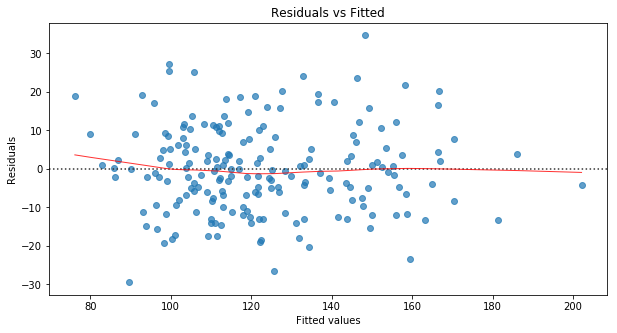

In [49]:
#Residuals vs. Fitted
m_fitted_y = model.fittedvalues
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.residplot(m_fitted_y, 'DriversKilled', data=seatbelts, lowess=True, scatter_kws={'alpha': 0.7},
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.show()
#uniform imprastiate

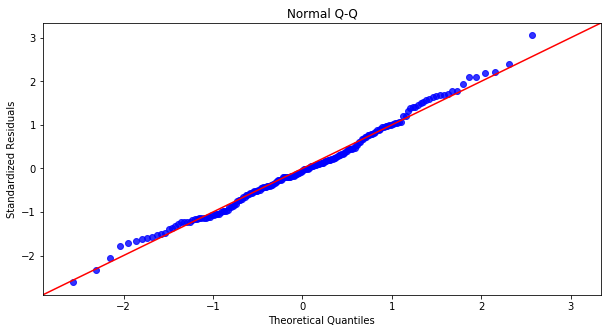

In [50]:
#Q-Q plot
m_norm_resid = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
qq = smgf.ProbPlot(m_norm_resid)
qq.qqplot(line='45', alpha=0.8, lw=1, ax=ax)
ax.set_title('Normal Q-Q')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Standardized Residuals')
plt.show()
#distribuite normal

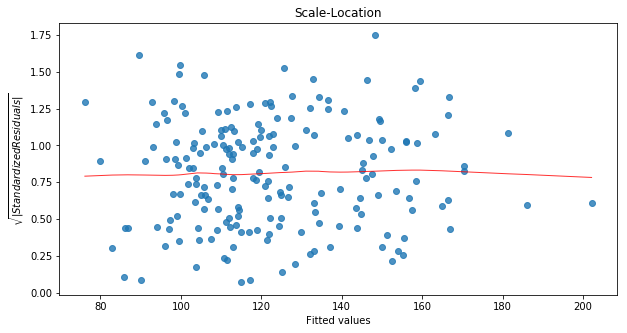

In [51]:
# Scale-Location
m_norm_resid_sqrt = np.sqrt(np.abs(m_norm_resid))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.regplot(m_fitted_y, m_norm_resid_sqrt, scatter=True, lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized Residuals|}$')
plt.show()
#distributie egala

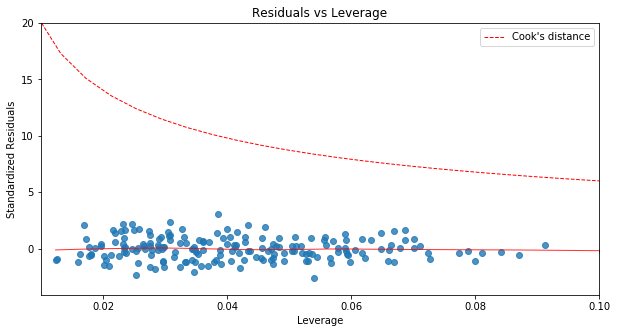

In [52]:
# Residuals vs. Leverage - Studentized Residuals vs. H Leverage
m_leverage = model.get_influence().hat_matrix_diag
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.regplot(m_leverage, m_norm_resid, scatter=True, lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')
ax.set_xlim(0.01, 0.1)
ax.set_ylim(-4.1, 20)

def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    ax.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.2, 50), 'Cook\'s distance') # 0.5 line
#graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
#      np.linspace(0.001, 0.7, 50)) # 1 line
ax.legend(loc='upper right');
plt.show()